In [1]:
import numpy

In [2]:
import pylab

In [3]:
# intial parameters
n_iter = 50
sz = (n_iter,) # size of array
x = -0.37727 # truth value (typo in example at top of p. 13 calls this z)
z = numpy.random.normal(x,0.1,size=sz) # observations (normal about x, sigma=0.1)

In [4]:
x

-0.37727

In [5]:
# allocate space for arrays
xhat = numpy.zeros(sz)      # a posteri estimate of x
P = numpy.zeros(sz)         # a posteri error estimate
xhatminus = numpy.zeros(sz) # a priori estimate of x
Pminus = numpy.zeros(sz)    # a priori error estimate
K = numpy.zeros(sz)         # gain or blending factor

In [6]:
Q = 1e-5 # process variance

In [7]:
R = 0.1**2 # estimate of measurement variance, change to see effect

In [8]:
# intial guesses
xhat[0] = 0.0
P[0] = 1.0


In [9]:
for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1] + Q
    # measurement update
    K[k] = Pminus[k] / ( Pminus[k] + R )
    xhat[k] = xhatminus[k] + K[k] * (z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

In [10]:
pylab.figure()

In [11]:
pylab.plot(z,'k+',label='noisy measurements')
pylab.plot(xhat,'b-',label='a posteri estimate')
pylab.axhline(x,color='g',label='truth value')
pylab.legend()
pylab.xlabel('Iteration')
pylab.ylabel('Voltage')

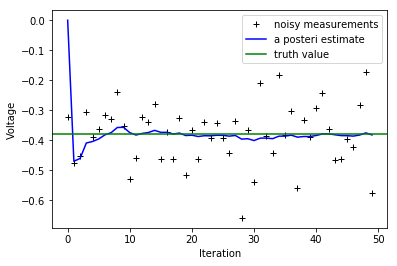

In [12]:
pylab.show()